In [1]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt

# Models Classification
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Misc
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings("ignore")

# Utils

In [2]:
# Calculate ivariate
def calculateBivariate(df, feature, target, return_table=False, plot=False):
    '''
        Function aiming to analyze the variables 

        Args:
            df: Pandas dataframe containing the variables and target.
            feature: String with the name of the variable to be analyzed.
            target: String with the name of the column representing the target.
            return_table: Boolean to return the table or Information Value.
    '''
    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])

    data['Good'] = data['All'] - data['Bad']
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = data['Good'] / data['Good'].sum()
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['Log Odds'] = np.log(data['Bad']/data['Good'])
    
    if plot:       
        sns.lineplot(data=data, x='Value', y='Log Odds')

        return 

    data['Lift'] = data['Bad Rate'] / (data['Bad'].sum() / (data['All'].sum()))
        
    data['WoE'] = np.log(data['Distribution Good']/data['Distribution Bad'])

    for idx in range(len(data['Distribution Good'])):
        if data['Distribution Bad'].iloc[idx] == 0 or data['Distribution Good'].iloc[idx] == 0:
            data['WoE'].iloc[idx] = np.log((data['Distribution Good'].iloc[idx] + 0.5) / (data['Distribution Bad'].iloc[idx] + 0.5))
        
    
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if return_table:
        return data

    return data['IV'][0]

# 1.0 - Carregamento do Dataset de Treino

In [3]:
xTrain = pd.read_csv('train_clear.csv')

# 2.0 - Importância das Variáveis

## 2.1 - Random Forest

Text(0.5, 0, 'Random Forest Feature Importance')

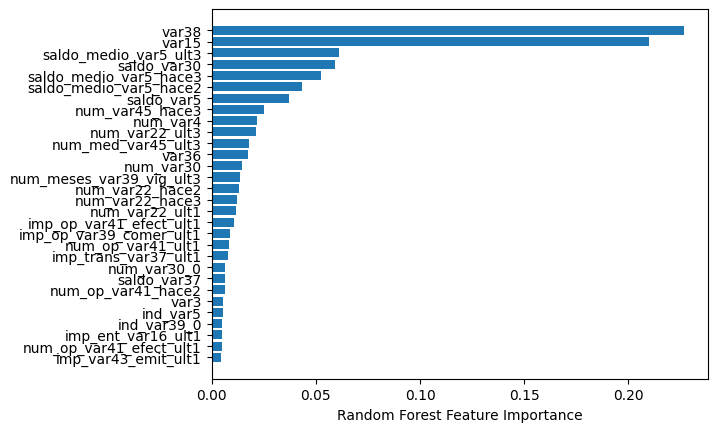

In [4]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(xTrain.drop(labels=['TARGET'], axis = 1), xTrain.TARGET)

# ### Get importance
importance = model.feature_importances_

# ### Plot
sorted_idx = importance.argsort()[-30:]
plt.barh(xTrain.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 2.2 - XGBoost

Text(0.5, 0, 'XGBoost Feature Importance')

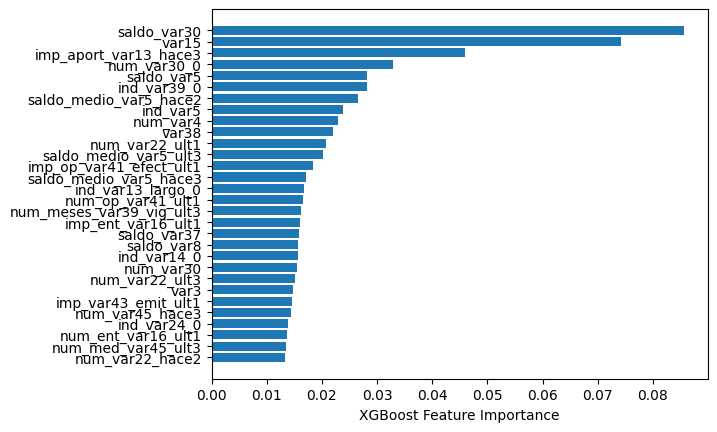

In [5]:
model = XGBClassifier(scale_pos_weight = 25)
model.fit(xTrain.drop(labels=['TARGET'], axis = 1), xTrain.TARGET)

# ### Get importance
feat_importance = model.feature_importances_

# ### Plot
sorted_idx = feat_importance.argsort()[-30:]
plt.barh(xTrain.columns[sorted_idx], feat_importance[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

# 2.0 - Análise Bivariada

In [6]:
# ### Get variables name
cols = xTrain.columns

## 2.1 - var3

In [7]:
calculateBivariate(xTrain, cols[0], 'TARGET', True)

,Variable,Value,All,Bad,Good,Bad Rate,Distribution Good,Distribution Bad,Log Odds,Lift,WoE,IV
1,var3,-999999,83,2,81,0.024096,0.001483,0.000932,-3.701302,0.637297,0.464672,0.009721
13,var3,0,57,3,54,0.052632,0.000989,0.001398,-2.890372,1.391990,-0.346258,0.009721
5,var3,1,79,8,71,0.101266,0.001300,0.003728,-2.183238,2.678259,-1.053391,0.009721
0,var3,2,55277,2100,53177,0.037990,0.973742,0.978565,-3.231689,1.004765,-0.004941,0.009721
8,var3,3,81,1,80,0.012346,0.001465,0.000466,-4.382027,0.326516,1.145397,0.009721
...,...,...,...,...,...,...,...,...,...,...,...,...
111,var3,228,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.009721
170,var3,229,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.009721
157,var3,231,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.009721
130,var3,235,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.009721


In [8]:
xTrain.var3[xTrain.var3 == -999999] = np.median(xTrain.var3)

In [9]:
calculateBivariate(xTrain, cols[0], 'TARGET', True)

,Variable,Value,All,Bad,Good,Bad Rate,Distribution Good,Distribution Bad,Log Odds,Lift,WoE,IV
12,var3,0,57,3,54,0.052632,0.000989,0.001398,-2.890372,1.391990,-0.346258,0.00946
4,var3,1,79,8,71,0.101266,0.001300,0.003728,-2.183238,2.678259,-1.053391,0.00946
0,var3,2,55360,2102,53258,0.037970,0.975225,0.979497,-3.232259,1.004214,-0.004371,0.00946
7,var3,3,81,1,80,0.012346,0.001465,0.000466,-4.382027,0.326516,1.145397,0.00946
23,var3,4,63,3,60,0.047619,0.001099,0.001398,-2.995732,1.259420,-0.240897,0.00946
...,...,...,...,...,...,...,...,...,...,...,...,...
110,var3,228,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.00946
169,var3,229,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.00946
156,var3,231,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.00946
129,var3,235,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.00946


## 2.2 - var15

In [10]:
iv = calculateBivariate(xTrain, cols[1], 'TARGET')
print(f"Information Value {cols[1]} = {iv:.6f}")

Information Value var15 = 0.724916


In [11]:
calculateBivariate(xTrain, cols[1], 'TARGET', True)

,Variable,Value,All,Bad,Good,Bad Rate,Distribution Good,Distribution Bad,Log Odds,Lift,WoE,IV
61,var15,5,22,0,22,0.000000,0.000403,0.000000,-inf,0.000000,0.000805,0.724916
83,var15,6,18,0,18,0.000000,0.000330,0.000000,-inf,0.000000,0.000659,0.724916
96,var15,7,4,0,4,0.000000,0.000073,0.000000,-inf,0.000000,0.000146,0.724916
77,var15,8,9,0,9,0.000000,0.000165,0.000000,-inf,0.000000,0.000330,0.724916
87,var15,9,13,0,13,0.000000,0.000238,0.000000,-inf,0.000000,0.000476,0.724916
...,...,...,...,...,...,...,...,...,...,...,...,...
92,var15,100,4,0,4,0.000000,0.000073,0.000000,-inf,0.000000,0.000146,0.724916
90,var15,101,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.724916
93,var15,102,3,1,2,0.333333,0.000037,0.000466,-0.693147,8.815937,-2.543483,0.724916
97,var15,104,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.724916


In [12]:
# ### Update variable
xTrain.var15[xTrain.var15 < 23] = 22 
xTrain.var15[xTrain.var15 > 102] = 103

In [13]:
iv = calculateBivariate(xTrain, cols[1], 'TARGET')
print(f"New Information Value {cols[1]} = {iv:.6f}")

New Information Value var15 = 0.725134


In [14]:
calculateBivariate(xTrain, cols[1], 'TARGET', True)

,Variable,Value,All,Bad,Good,Bad Rate,Distribution Good,Distribution Bad,Log Odds,Lift,WoE,IV
34,var15,22,886,0,886,0.000000,0.016224,0.000000,-inf,0.000000,0.031932,0.725134
0,var15,23,14402,95,14307,0.006596,0.261980,0.044268,-5.014627,0.174458,1.777998,0.725134
22,var15,24,4565,50,4515,0.010953,0.082676,0.023299,-4.503137,0.289680,1.266508,0.725134
4,var15,25,3135,50,3085,0.015949,0.056490,0.023299,-4.122284,0.421815,0.885654,0.725134
27,var15,26,2463,64,2399,0.025985,0.043929,0.029823,-3.623924,0.687235,0.387294,0.725134
...,...,...,...,...,...,...,...,...,...,...,...,...
79,var15,99,5,0,5,0.000000,0.000092,0.000000,-inf,0.000000,0.000183,0.725134
76,var15,100,4,0,4,0.000000,0.000073,0.000000,-inf,0.000000,0.000146,0.725134
74,var15,101,1,0,1,0.000000,0.000018,0.000000,-inf,0.000000,0.000037,0.725134
77,var15,102,3,1,2,0.333333,0.000037,0.000466,-0.693147,8.815937,-2.543483,0.725134


## 2.3 - imp_ent_var16_ult1

In [15]:
iv = calculateBivariate(xTrain, cols[2], 'TARGET')
print(f"Information Value {cols[2]} = {iv:.6f}")

Information Value imp_ent_var16_ult1 = 0.032395


In [16]:
sum(xTrain.imp_ent_var16_ult1 < 0)

0

In [17]:
sum(xTrain.imp_ent_var16_ult1 > 51003)

9

In [18]:
# ### Update variable
xTrain.imp_ent_var16_ult1[xTrain.imp_ent_var16_ult1 > 51003] = 51004 

In [19]:
iv = calculateBivariate(xTrain, cols[2], 'TARGET')
print(f"New Information Value {cols[2]} = {iv:.6f}")

New Information Value imp_ent_var16_ult1 = 0.032395


## 2.4 - imp_op_var39_comer_ult1

In [20]:
iv = calculateBivariate(xTrain, cols[3], 'TARGET')
print(f"Information Value {cols[3]} = {iv:.6f}")

Information Value imp_op_var39_comer_ult1 = 0.075214


In [21]:
sum(xTrain.imp_op_var39_comer_ult1 < 0)

0

In [22]:
sum(xTrain.imp_op_var39_comer_ult1 > 12888.030000)

0

## 2.5 - imp_op_var40_comer_ult3

In [23]:
iv = calculateBivariate(xTrain, cols[4], 'TARGET')
print(f"Information Value {cols[4]} = {iv:.6f}")

Information Value imp_op_var40_comer_ult3 = 0.000007


In [24]:
sum(xTrain.imp_op_var40_comer_ult3 < 0)

0

In [25]:
sum(xTrain.imp_op_var40_comer_ult3 > 3639.87)

29

In [26]:
# ### Update Variable
xTrain.imp_op_var40_comer_ult3[xTrain.imp_op_var40_comer_ult3 > 3639.87] = 3640.00 	 

In [27]:
iv = calculateBivariate(xTrain, cols[4], 'TARGET')
print(f"New Information Value {cols[4]} = {iv:.6f}")

New Information Value imp_op_var40_comer_ult3 = 0.000007


## 2.6 - imp_op_var41_efect_ult1

In [28]:
iv = calculateBivariate(xTrain, cols[5], 'TARGET')
print(f"Information Value {cols[5]} = {iv:.6f}")

Information Value imp_op_var41_efect_ult1 = 0.070221


In [29]:
sum(xTrain.imp_op_var41_efect_ult1 < 0)

0

In [30]:
sum(xTrain.imp_op_var41_efect_ult1 > 13110)

10

In [31]:
# ### Update variable
xTrain.imp_op_var41_efect_ult1[xTrain.imp_op_var41_efect_ult1 > 13110] = 13111 

In [32]:
iv = calculateBivariate(xTrain, cols[5], 'TARGET')
print(f"New Information Value {cols[5]} = {iv:.6f}")

New Information Value imp_op_var41_efect_ult1 = 0.070221


## 2.7 - ind_var1_0

In [33]:
iv = calculateBivariate(xTrain, cols[6], 'TARGET')
print(f"Information Value {cols[6]} = {iv:.6f}")

Information Value ind_var1_0 = 0.000393


## 2.8 - ind_var5_0

In [34]:
iv = calculateBivariate(xTrain, cols[7], 'TARGET')
print(f"Information Value {cols[7]} = {iv:.6f}")

Information Value ind_var5_0 = 0.023591


## 2.9 - ind_var5

In [35]:
iv = calculateBivariate(xTrain, cols[8], 'TARGET')
print(f"Information Value {cols[8]} = {iv:.6f}")

Information Value ind_var5 = 0.388268


## 2.10 - ind_var12_0

In [36]:
iv = calculateBivariate(xTrain, cols[9], 'TARGET')
print(f"Information Value {cols[9]} = {iv:.6f}")

Information Value ind_var12_0 = 0.058933


## 2.11 - ind_var13_0

In [37]:
iv = calculateBivariate(xTrain, cols[10], 'TARGET')
print(f"Information Value {cols[10]} = {iv:.6f}")

Information Value ind_var13_0 = 0.085021


## 2.12 - ind_var13_largo_0

In [38]:
iv = calculateBivariate(xTrain, cols[11], 'TARGET')
print(f"Information Value {cols[11]} = {iv:.6f}")

Information Value ind_var13_largo_0 = 0.025659


## 2.13 - ind_var14_0

In [39]:
iv = calculateBivariate(xTrain, cols[12], 'TARGET')
print(f"Information Value {cols[12]} = {iv:.6f}")

Information Value ind_var14_0 = 0.015491


## 2.14 - ind_var24_0

In [40]:
iv = calculateBivariate(xTrain, cols[13], 'TARGET')
print(f"Information Value {cols[13]} = {iv:.6f}")

Information Value ind_var24_0 = 0.036701


## 2.15 - ind_var25_cte

In [41]:
iv = calculateBivariate(xTrain, cols[14], 'TARGET')
print(f"Information Value {cols[14]} = {iv:.6f}")

Information Value ind_var25_cte = 0.013608


## 2.16 - ind_var37_cte

In [42]:
iv = calculateBivariate(xTrain, cols[15], 'TARGET')
print(f"Information Value {cols[15]} = {iv:.6f}")

Information Value ind_var37_cte = 0.000922


## 2.17 - ind_var39_0

In [43]:
iv = calculateBivariate(xTrain, cols[16], 'TARGET')
print(f"Information Value {cols[16]} = {iv:.6f}")

Information Value ind_var39_0 = 0.026272


## 2.18 - num_var4

In [44]:
iv = calculateBivariate(xTrain, cols[17], 'TARGET')
print(f"Information Value {cols[17]} = {iv:.6f}")

Information Value num_var4 = 0.486303


In [45]:
sum(xTrain.num_var4 < 0)

0

In [46]:
sum(xTrain.num_var4 > 5)

31

In [47]:
# ### Update Variable
xTrain.num_var4[xTrain.num_var4 > 5] = 6 

In [48]:
iv = calculateBivariate(xTrain, cols[17], 'TARGET')
print(f"New Information Value {cols[17]} = {iv:.6f}")

New Information Value num_var4 = 0.486303


## 2.19 - num_var14_0

In [49]:
iv = calculateBivariate(xTrain, cols[18], 'TARGET')
print(f"Information Value {cols[18]} = {iv:.6f}")

Information Value num_var14_0 = 0.016585


## 2.20 - num_var14

In [50]:
iv = calculateBivariate(xTrain, cols[19], 'TARGET')
print(f"Information Value {cols[19]} = {iv:.6f}")

Information Value num_var14 = 0.002830


## 2.21 - num_op_var41_hace2

In [51]:
iv = calculateBivariate(xTrain, cols[20], 'TARGET')
print(f"Information Value {cols[20]} = {iv:.6f}")

Information Value num_op_var41_hace2 = 0.012525


In [52]:
sum(xTrain.num_op_var41_hace2 < 0)

0

In [53]:
sum(xTrain.num_op_var41_hace2 > 129)

6

In [54]:
# ### Update variable
xTrain.num_var4[xTrain.num_var4 > 129] = 130

In [55]:
iv = calculateBivariate(xTrain, cols[20], 'TARGET')
print(f"New Information Value {cols[20]} = {iv:.6f}")

New Information Value num_op_var41_hace2 = 0.012525


## 2.22 - num_op_var41_hace3

In [56]:
iv = calculateBivariate(xTrain, cols[21], 'TARGET')
print(f"Information Value {cols[21]} = {iv:.6f}")

Information Value num_op_var41_hace3 = 0.005157


In [57]:
sum(xTrain.num_op_var41_hace3 < 0)

0

In [58]:
sum(xTrain.num_op_var41_hace3 > 30)

17

In [59]:
# ### Update variable
xTrain.num_op_var41_hace3[xTrain.num_op_var41_hace3 > 30] = 31

In [60]:
iv = calculateBivariate(xTrain, cols[21], 'TARGET')
print(f"New Information Value {cols[21]} = {iv:.6f}")

New Information Value num_op_var41_hace3 = 0.005157


## 2.22 - num_op_var41_ult1

In [61]:
iv = calculateBivariate(xTrain, cols[22], 'TARGET')
print(f"Information Value {cols[22]} = {iv:.6f}")

Information Value num_op_var41_ult1 = 0.027777


In [62]:
sum(xTrain.num_op_var41_ult1 < 0)

0

In [63]:
sum(xTrain.num_op_var41_ult1 > 174)

12

In [64]:
# ### Update variable
xTrain.num_op_var41_ult1[xTrain.num_op_var41_ult1 > 174] = 175

In [65]:
iv = calculateBivariate(xTrain, cols[22], 'TARGET')
print(f"New Information Value {cols[22]} = {iv:.6f}")

New Information Value num_op_var41_ult1 = 0.027777


## 2.24 - num_var30_0

In [66]:
iv = calculateBivariate(xTrain, cols[23], 'TARGET')
print(f"Information Value {cols[23]} = {iv:.6f}")

Information Value num_var30_0 = 0.081388


In [67]:
sum(xTrain.num_var30_0 < 0)

0

In [68]:
sum(xTrain.num_var30_0 > 114)

0

## 2.25 - num_var30

In [69]:
iv = calculateBivariate(xTrain, cols[24], 'TARGET')
print(f"Information Value {cols[24]} = {iv:.6f}")

Information Value num_var30 = 0.456831


In [70]:
sum(xTrain.num_var30 < 0)

0

In [71]:
sum(xTrain.num_var30 > 9)

30

In [72]:
# ### Update variable
xTrain.num_var30[xTrain.num_var30 > 9] = 10

In [73]:
iv = calculateBivariate(xTrain, cols[24], 'TARGET')
print(f"New Information Value {cols[24]} = {iv:.6f}")

New Information Value num_var30 = 0.456831


In [74]:
calculateBivariate(xTrain, cols[24], 'TARGET', True).style

,Variable,Value,All,Bad,Good,Bad Rate,Distribution Good,Distribution Bad,Log Odds,Lift,WoE,IV
1,num_var30,0,13854,1173,12681,0.084669,0.232206,0.546598,-2.380540,2.239301,-0.856089,0.456831
0,num_var30,3,39533,938,38595,0.023727,0.706726,0.437092,-3.717128,0.627528,0.480498,0.456831
2,num_var30,6,3098,33,3065,0.010652,0.056124,0.015377,-4.531295,0.281723,1.294666,0.456831
4,num_var30,9,242,2,240,0.008264,0.004395,0.000932,-4.787492,0.218577,1.550862,0.456831
3,num_var30,10,30,0,30,0.000000,0.000549,0.000000,-inf,0.000000,0.001098,0.456831


## 2.26 - num_var37_med_ult2

In [75]:
iv = calculateBivariate(xTrain, cols[25], 'TARGET')
print(f"Information Value {cols[25]} = {iv:.6f}")

Information Value num_var37_med_ult2 = 0.002973


In [76]:
sum(xTrain.num_var37_med_ult2 < 0)

0

In [77]:
sum(xTrain.num_var37_med_ult2 > 39)

7

In [78]:
# ### Update variable
xTrain.num_var37_med_ult2[xTrain.num_var37_med_ult2 > 39] = 40

In [79]:
iv = calculateBivariate(xTrain, cols[25], 'TARGET')
print(f"New Information Value {cols[25]} = {iv:.6f}")

New Information Value num_var37_med_ult2 = 0.002973


## 2.27 - saldo_var5

In [80]:
iv = calculateBivariate(xTrain, cols[26], 'TARGET')
print(f"Information Value {cols[26]} = {iv:.6f}")

Information Value saldo_var5 = 0.624786


In [81]:
sum(xTrain.saldo_var5 > 137614.62)

76

In [82]:
# ### Update variable
xTrain.saldo_var5[xTrain.saldo_var5 > 137614.62] = 137615.00

In [83]:
iv = calculateBivariate(xTrain, cols[26], 'TARGET')
print(f"New Information Value {cols[26]} = {iv:.6f}")

New Information Value saldo_var5 = 0.624790


## 2.28 - saldo_var8

In [84]:
iv = calculateBivariate(xTrain, cols[27], 'TARGET')
print(f"Information Value {cols[27]} = {iv:.6f}")

Information Value saldo_var8 = 0.019079


In [85]:
sum(xTrain.saldo_var8 > 60098.49)

15

In [86]:
# ### Update variable
xTrain.saldo_var8[xTrain.saldo_var8 > 60098.49] = 60099.00

In [87]:
iv = calculateBivariate(xTrain, cols[27], 'TARGET')
print(f"New Information Value {cols[27]} = {iv:.6f}")

New Information Value saldo_var8 = 0.019079


## 2.29 - saldo_var12

In [88]:
iv = calculateBivariate(xTrain, cols[28], 'TARGET')
print(f"Information Value {cols[28]} = {iv:.6f}")

Information Value saldo_var12 = 0.006059


In [89]:
sum(xTrain.saldo_var12 < 0)

0

In [90]:
sum(xTrain.saldo_var12 > 506413.14)

90

In [91]:
# ### Update variable
xTrain.saldo_var12[xTrain.saldo_var12 > 506413.14] = 506414.00

In [92]:
iv = calculateBivariate(xTrain, cols[28], 'TARGET')
print(f"New Information Value {cols[28]} = {iv:.6f}")

New Information Value saldo_var12 = 0.006064


## 2.30 - saldo_var13_corto

In [93]:
iv = calculateBivariate(xTrain, cols[29], 'TARGET')
print(f"Information Value {cols[29]} = {iv:.6f}")

Information Value saldo_var13_corto = 0.012509


In [94]:
sum(xTrain.saldo_var13_corto < 0)

0

In [95]:
sum(xTrain.saldo_var13_corto > 309000)

143

In [96]:
# ### Update variable
xTrain.saldo_var13_corto[xTrain.saldo_var13_corto > 309000] = 309001

In [97]:
iv = calculateBivariate(xTrain, cols[29], 'TARGET')
print(f"New Information Value {cols[29]} = {iv:.6f}")

New Information Value saldo_var13_corto = 0.012519


## 2.31 - saldo_var13_largo

In [98]:
iv = calculateBivariate(xTrain, cols[30], 'TARGET')
print(f"Information Value {cols[30]} = {iv:.6f}")

Information Value saldo_var13_largo = 0.000340


## 2.32 - saldo_var14

In [99]:
iv = calculateBivariate(xTrain, cols[31], 'TARGET')
print(f"Information Value {cols[31]} = {iv:.6f}")

Information Value saldo_var14 = 0.002340


## 2.32 - saldo_var26

In [100]:
iv = calculateBivariate(xTrain, cols[32], 'TARGET')
print(f"Information Value {cols[32]} = {iv:.6f}")

Information Value saldo_var26 = 0.019929


In [101]:
sum(xTrain.saldo_var26 < 0)

0

In [102]:
sum(xTrain.saldo_var26 > 10381.29)

35

In [103]:
# ### Update variable
xTrain.saldo_var26[xTrain.saldo_var26 > 10381.29] = 10382.00

In [104]:
iv = calculateBivariate(xTrain, cols[32], 'TARGET')
print(f"Information Value {cols[32]} = {iv:.6f}")

Information Value saldo_var26 = 0.019930


## 2.34 - saldo_var30

In [105]:
iv = calculateBivariate(xTrain, cols[33], 'TARGET')
print(f"Information Value {cols[33]} = {iv:.6f}")

Information Value saldo_var30 = 0.731987


In [106]:
sum(xTrain.saldo_var30 < -1842)

1

In [107]:
sum(xTrain.saldo_var30 > 506443.14)

116

In [108]:
# ### Update variable
xTrain.saldo_var30[xTrain.saldo_var30 > 506443.14] = 506444.00

In [109]:
iv = calculateBivariate(xTrain, cols[33], 'TARGET')
print(f"INew nformation Value {cols[33]} = {iv:.6f}")

INew nformation Value saldo_var30 = 0.731996


In [110]:
calculateBivariate(xTrain, cols[33], 'TARGET', True)

,Variable,Value,All,Bad,Good,Bad Rate,Distribution Good,Distribution Bad,Log Odds,Lift,WoE,IV
8339,saldo_var30,-2994.93,1,0,1,0.0,0.000018,0.000000,-inf,0.00000,0.000037,0.731996
11318,saldo_var30,-1842.00,1,1,0,1.0,0.000000,0.000466,inf,26.44781,-0.000932,0.731996
10000,saldo_var30,-1802.01,1,0,1,0.0,0.000018,0.000000,-inf,0.00000,0.000037,0.731996
13641,saldo_var30,-1774.80,1,0,1,0.0,0.000018,0.000000,-inf,0.00000,0.000037,0.731996
12615,saldo_var30,-1730.28,1,1,0,1.0,0.000000,0.000466,inf,26.44781,-0.000932,0.731996
...,...,...,...,...,...,...,...,...,...,...,...,...
2657,saldo_var30,503730.66,1,0,1,0.0,0.000018,0.000000,-inf,0.00000,0.000037,0.731996
11851,saldo_var30,504075.54,1,0,1,0.0,0.000018,0.000000,-inf,0.00000,0.000037,0.731996
423,saldo_var30,505145.16,1,0,1,0.0,0.000018,0.000000,-inf,0.00000,0.000037,0.731996
5086,saldo_var30,506443.14,1,1,0,1.0,0.000000,0.000466,inf,26.44781,-0.000932,0.731996


## 2.35 - saldo_var37

In [111]:
iv = calculateBivariate(xTrain, cols[34], 'TARGET')
print(f"Information Value {cols[34]} = {iv:.6f}")

Information Value saldo_var37 = 0.047156


In [112]:
sum(xTrain.saldo_var37 < 0)

0

In [113]:
sum(xTrain.saldo_var37 > 21261.09)

5

In [114]:
# ### Update variable
xTrain.saldo_var37[xTrain.saldo_var37 > 21261.09] = 21262.00

In [115]:
iv = calculateBivariate(xTrain, cols[34], 'TARGET')
print(f"New Information Value {cols[34]} = {iv:.6f}")

New Information Value saldo_var37 = 0.047156


## 2.36 - var36

In [116]:
iv = calculateBivariate(xTrain, cols[35], 'TARGET')
print(f"Information Value {cols[35]} = {iv:.6f}")

Information Value var36 = 0.273300


In [117]:
sum(xTrain.var36 < 0)

0

In [118]:
sum(xTrain.var36 > 99)

0

## 2.37 - delta_imp_aport_var13_1y3

In [119]:
iv = calculateBivariate(xTrain, cols[36], 'TARGET')
print(f"Information Value {cols[36]} = {iv:.6f}")

Information Value delta_imp_aport_var13_1y3 = 0.068473


In [120]:
sum(xTrain.var36 < -1)

0

In [121]:
sum(xTrain.var36 > 9999999999)

0

## 2.38 - imp_aport_var13_hace3

In [122]:
iv = calculateBivariate(xTrain, cols[37], 'TARGET')
print(f"Information Value {cols[37]} = {iv:.6f}")

Information Value imp_aport_var13_hace3 = 0.001126


In [123]:
sum(xTrain.imp_aport_var13_hace3 < 0)

0

In [124]:
sum(xTrain.imp_aport_var13_hace3 > 120000)

528

In [125]:
# ### Update variable
xTrain.imp_aport_var13_hace3[xTrain.imp_aport_var13_hace3 > 120000] = 120001

In [126]:
iv = calculateBivariate(xTrain, cols[37], 'TARGET')
print(f"New Information Value {cols[37]} = {iv:.6f}")

New Information Value imp_aport_var13_hace3 = 0.001302


## 2.39 - imp_aport_var13_ult1

In [127]:
iv = calculateBivariate(xTrain, cols[38], 'TARGET')
print(f"Information Value {cols[38]} = {iv:.6f}")

Information Value imp_aport_var13_ult1 = 0.001730


In [128]:
sum(xTrain.imp_aport_var13_ult1 < 0)

0

In [129]:
sum(xTrain.imp_aport_var13_ult1 > 51006)

210

In [130]:
# ### Update variable
xTrain.imp_aport_var13_ult1[xTrain.imp_aport_var13_ult1 > 51006] = 51007

In [131]:
iv = calculateBivariate(xTrain, cols[38], 'TARGET')
print(f"New Information Value {cols[38]} = {iv:.6f}")

New Information Value imp_aport_var13_ult1 = 0.001758


## 2.40 - imp_var43_emit_ult1

In [132]:
iv = calculateBivariate(xTrain, cols[39], 'TARGET')
print(f"Information Value {cols[39]} = {iv:.6f}")

Information Value imp_var43_emit_ult1 = 0.031154


In [133]:
sum(xTrain.imp_var43_emit_ult1 < 0)

0

In [134]:
sum(xTrain.imp_var43_emit_ult1 > 540000)

10

In [135]:
# ### Update variable
xTrain.imp_var43_emit_ult1[xTrain.imp_var43_emit_ult1 > 540000] = 540001.00

In [136]:
iv = calculateBivariate(xTrain, cols[39], 'TARGET')
print(f"New Information Value {cols[39]} = {iv:.6f}")

New Information Value imp_var43_emit_ult1 = 0.031154


## 2.41 - imp_trans_var37_ult1

In [137]:
iv = calculateBivariate(xTrain, cols[40], 'TARGET')
print(f"Information Value {cols[40]} = {iv:.6f}")

Information Value imp_trans_var37_ult1 = 0.075117


In [138]:
sum(xTrain.imp_trans_var37_ult1 < 0)

0

In [139]:
sum(xTrain.imp_trans_var37_ult1 > 483003)

30

In [140]:
# ### Update variable
xTrain.imp_trans_var37_ult1[xTrain.imp_trans_var37_ult1 > 483003] = 483004

In [141]:
iv = calculateBivariate(xTrain, cols[40], 'TARGET')
print(f"New Information Value {cols[40]} = {iv:.6f}")

New Information Value imp_trans_var37_ult1 = 0.075117


## 2.42 - ind_var43_emit_ult1

In [142]:
iv = calculateBivariate(xTrain, cols[41], 'TARGET')
print(f"Information Value {cols[41]} = {iv:.6f}")

Information Value ind_var43_emit_ult1 = 0.001066


## 2.43 - ind_var43_recib_ult1

In [143]:
iv = calculateBivariate(xTrain, cols[42], 'TARGET')
print(f"Information Value {cols[42]} = {iv:.6f}")

Information Value ind_var43_recib_ult1 = 0.008613


## 2.44 - var21

In [144]:
iv = calculateBivariate(xTrain, cols[43], 'TARGET')
print(f"Information Value {cols[43]} = {iv:.6f}")

Information Value var21 = 0.005521


In [145]:
sum(xTrain.var21 < 0)

0

In [146]:
sum(xTrain.var21 > 7200)

17

In [147]:
# ### Update variable
xTrain.var21[xTrain.var21 > 7200] = 7201

In [148]:
iv = calculateBivariate(xTrain, cols[43], 'TARGET')
print(f"New Information Value {cols[43]} = {iv:.6f}")

New Information Value var21 = 0.005521


## 2.45 - num_aport_var13_hace3

In [149]:
iv = calculateBivariate(xTrain, cols[44], 'TARGET')
print(f"Information Value {cols[44]} = {iv:.6f}")

Information Value num_aport_var13_hace3 = 0.058514


In [150]:
sum(xTrain.num_aport_var13_hace3 < 0)

0

In [151]:
sum(xTrain.num_aport_var13_hace3 > 6)

33

In [152]:
# ### Update variable
xTrain.num_aport_var13_hace3[xTrain.num_aport_var13_hace3 > 6] = 7

In [153]:
iv = calculateBivariate(xTrain, cols[44], 'TARGET')
print(f"New Information Value {cols[44]} = {iv:.6f}")

New Information Value num_aport_var13_hace3 = 0.058514


## 2.46 - num_ent_var16_ult1

In [154]:
iv = calculateBivariate(xTrain, cols[45], 'TARGET')
print(f"Information Value {cols[45]} = {iv:.6f}")

Information Value num_ent_var16_ult1 = 0.005197


In [155]:
sum(xTrain.num_ent_var16_ult1 < 0)

0

In [156]:
sum(xTrain.num_ent_var16_ult1 > 15)

15

In [157]:
# ### Update variable
xTrain.num_ent_var16_ult1[xTrain.num_ent_var16_ult1 > 15] = 16

In [158]:
iv = calculateBivariate(xTrain, cols[45], 'TARGET')
print(f"New Information Value {cols[45]} = {iv:.6f}")

New Information Value num_ent_var16_ult1 = 0.005197


## 2.47 - num_var22_hace2

In [159]:
iv = calculateBivariate(xTrain, cols[46], 'TARGET')
print(f"Information Value {cols[46]} = {iv:.6f}")

Information Value num_var22_hace2 = 0.011273


In [160]:
sum(xTrain.num_var22_hace2 < 0)

0

In [161]:
sum(xTrain.num_var22_hace2 > 42)

13

In [162]:
# ### Update variable
xTrain.num_var22_hace2[xTrain.num_var22_hace2 > 42] = 43

In [163]:
iv = calculateBivariate(xTrain, cols[46], 'TARGET')
print(f"New Information Value {cols[46]} = {iv:.6f}")

New Information Value num_var22_hace2 = 0.011273


## 2.48 - num_var22_hace3

In [164]:
iv = calculateBivariate(xTrain, cols[47], 'TARGET')
print(f"Information Value {cols[47]} = {iv:.6f}")

Information Value num_var22_hace3 = 0.006558


In [165]:
sum(xTrain.num_var22_hace3 < 0)

0

In [166]:
sum(xTrain.num_var22_hace3 > 33)

19

In [167]:
# ### Update variale
xTrain.num_var22_hace3[xTrain.num_var22_hace3 > 33] = 34

In [168]:
iv = calculateBivariate(xTrain, cols[47], 'TARGET')
print(f"New Information Value {cols[47]} = {iv:.6f}")

New Information Value num_var22_hace3 = 0.006558


## 2.49 - num_var22_ult1

In [169]:
iv = calculateBivariate(xTrain, cols[48], 'TARGET')
print(f"Information Value {cols[48]} = {iv:.6f}")

Information Value num_var22_ult1 = 0.022700


In [170]:
sum(xTrain.num_var22_ult1 < 0)

0

In [171]:
sum(xTrain.num_var22_ult1 > 42)

4

In [172]:
# ### Update variable
xTrain.num_var22_ult1[xTrain.num_var22_ult1 > 42] = 43

In [173]:
iv = calculateBivariate(xTrain, cols[48], 'TARGET')
print(f"New Information Value {cols[48]} = {iv:.6f}")

New Information Value num_var22_ult1 = 0.022700


## 2.50 - num_var22_ult3

In [174]:
iv = calculateBivariate(xTrain, cols[49], 'TARGET')
print(f"Information Value {cols[49]} = {iv:.6f}")

Information Value num_var22_ult3 = 0.019781


In [175]:
sum(xTrain.num_var22_ult3 < 0)

0

In [176]:
sum(xTrain.num_var22_ult3 > 93)

5

In [177]:
# ### Update variable
xTrain.num_var22_ult3[xTrain.num_var22_ult3 > 93] = 94

In [178]:
iv = calculateBivariate(xTrain, cols[49], 'TARGET')
print(f"New Information Value {cols[49]} = {iv:.6f}")

New Information Value num_var22_ult3 = 0.019781


## 2.51 - num_med_var45_ult3

In [179]:
iv = calculateBivariate(xTrain, cols[50], 'TARGET')
print(f"Information Value {cols[50]} = {iv:.6f}")

Information Value num_med_var45_ult3 = 0.031808


In [180]:
sum(xTrain.num_med_var45_ult3 < 0)

0

In [181]:
sum(xTrain.num_med_var45_ult3 > 213)

7

In [182]:
# ### Update variale
xTrain.num_med_var45_ult3[xTrain.num_med_var45_ult3 > 213] = 214

In [183]:
iv = calculateBivariate(xTrain, cols[50], 'TARGET')
print(f"New Information Value {cols[50]} = {iv:.6f}")

New Information Value num_med_var45_ult3 = 0.031808


## 2.52 - num_meses_var8_ult3

In [184]:
iv = calculateBivariate(xTrain, cols[51], 'TARGET')
print(f"Information Value {cols[51]} = {iv:.6f}")

Information Value num_meses_var8_ult3 = 0.021439


## 2.53 - num_meses_var39_vig_ult3

In [185]:
iv = calculateBivariate(xTrain, cols[52], 'TARGET')
print(f"Information Value {cols[52]} = {iv:.6f}")

Information Value num_meses_var39_vig_ult3 = 0.065318


## 2.54 - num_op_var40_comer_ult3

In [186]:
iv = calculateBivariate(xTrain, cols[53], 'TARGET')
print(f"Information Value {cols[53]} = {iv:.6f}")

Information Value num_op_var40_comer_ult3 = 0.004942


In [187]:
sum(xTrain.num_op_var40_comer_ult3 < 0)

0

In [188]:
sum(xTrain.num_op_var40_comer_ult3 > 48)

46

In [189]:
# ### Update variale
xTrain.num_op_var40_comer_ult3[xTrain.num_op_var40_comer_ult3 > 48] = 49

In [190]:
iv = calculateBivariate(xTrain, cols[53], 'TARGET')
print(f"New Information Value {cols[53]} = {iv:.6f}")

New Information Value num_op_var40_comer_ult3 = 0.004944


## 2.55 - num_op_var41_efect_ult1

In [191]:
iv = calculateBivariate(xTrain, cols[54], 'TARGET')
print(f"Information Value {cols[54]} = {iv:.6f}")

Information Value num_op_var41_efect_ult1 = 0.020994


In [192]:
sum(xTrain.num_op_var41_efect_ult1 < 0)

0

In [193]:
sum(xTrain.num_op_var41_efect_ult1 > 57)

10

In [194]:
# ### Update variable
xTrain.num_op_var41_efect_ult1[xTrain.num_op_var41_efect_ult1 > 57] = 58

In [195]:
iv = calculateBivariate(xTrain, cols[54], 'TARGET')
print(f"New Information Value {cols[54]} = {iv:.6f}")

New Information Value num_op_var41_efect_ult1 = 0.020994


## 2.56 - num_var43_emit_ult1

In [196]:
iv = calculateBivariate(xTrain, cols[55], 'TARGET')
print(f"Information Value {cols[55]} = {iv:.6f}")

Information Value num_var43_emit_ult1 = 0.004909


In [197]:
sum(xTrain.num_var43_emit_ult1 < 0)

0

In [198]:
sum(xTrain.num_var43_emit_ult1 > 24)

68

In [199]:
# ### Update variable
xTrain.num_var43_emit_ult1[xTrain.num_var43_emit_ult1 > 24] = 25

In [200]:
iv = calculateBivariate(xTrain, cols[55], 'TARGET')
print(f"New Information Value {cols[55]} = {iv:.6f}")

New Information Value num_var43_emit_ult1 = 0.004912


## 2.57 - num_var43_recib_ult1

In [201]:
iv = calculateBivariate(xTrain, cols[56], 'TARGET')
print(f"Information Value {cols[56]} = {iv:.6f}")

Information Value num_var43_recib_ult1 = 0.010229


In [202]:
sum(xTrain.num_var43_recib_ult1 < 0)

0

In [203]:
sum(xTrain.num_var43_recib_ult1 > 30)

116

In [204]:
# ### Update variale
xTrain.num_var43_recib_ult1[xTrain.num_var43_recib_ult1 > 30] = 31

In [205]:
iv = calculateBivariate(xTrain, cols[56], 'TARGET')
print(f"New Information Value {cols[56]} = {iv:.6f}")

New Information Value num_var43_recib_ult1 = 0.010237


## 2.58 - num_trasp_var11_ult1

In [206]:
iv = calculateBivariate(xTrain, cols[57], 'TARGET')
print(f"Information Value {cols[57]} = {iv:.6f}")

Information Value num_trasp_var11_ult1 = 0.004968


In [207]:
sum(xTrain.num_trasp_var11_ult1 < 0)

0

In [208]:
sum(xTrain.num_trasp_var11_ult1 > 18)

38

In [209]:
# ### Update variable
xTrain.num_trasp_var11_ult1[xTrain.num_trasp_var11_ult1 > 18] = 19

In [210]:
iv = calculateBivariate(xTrain, cols[57], 'TARGET')
print(f"New Information Value {cols[57]} = {iv:.6f}")

New Information Value num_trasp_var11_ult1 = 0.004969


## 2.59 - num_var45_hace3

In [211]:
iv = calculateBivariate(xTrain, cols[58], 'TARGET')
print(f"Information Value {cols[58]} = {iv:.6f}")

Information Value num_var45_hace3 = 0.026794


In [212]:
sum(xTrain.num_var45_hace3 < 0)

0

In [213]:
sum(xTrain.num_var45_hace3 > 330)

2

In [214]:
# ### Update variable
xTrain.num_var45_hace3[xTrain.num_var45_hace3 > 330] = 331

In [215]:
iv = calculateBivariate(xTrain, cols[58], 'TARGET')
print(f"New Information Value {cols[58]} = {iv:.6f}")

New Information Value num_var45_hace3 = 0.026794


## 2.60 - saldo_medio_var5_hace2

In [216]:
iv = calculateBivariate(xTrain, cols[59], 'TARGET')
print(f"Information Value {cols[59]} = {iv:.6f}")

Information Value saldo_medio_var5_hace2 = 0.774489


In [217]:
sum(xTrain.saldo_medio_var5_hace2 < -47.13)

1

In [218]:
sum(xTrain.saldo_medio_var5_hace2 > 165500.01)

63

In [219]:
# ### Update variable
xTrain.saldo_medio_var5_hace2[xTrain.saldo_medio_var5_hace2 < -47.13] = -48
xTrain.saldo_medio_var5_hace2[xTrain.saldo_medio_var5_hace2 > 165500.01] = 165501.00

In [220]:
iv = calculateBivariate(xTrain, cols[59], 'TARGET')
print(f"New Information Value {cols[59]} = {iv:.6f}")

New Information Value saldo_medio_var5_hace2 = 0.774492


## 2.61 - saldo_medio_var5_hace3

In [221]:
iv = calculateBivariate(xTrain, cols[60], 'TARGET')
print(f"Information Value {cols[60]} = {iv:.6f}")

Information Value saldo_medio_var5_hace3 = 0.534761


In [222]:
sum(xTrain.saldo_medio_var5_hace3 < -8.04)

0

In [223]:
sum(xTrain.saldo_medio_var5_hace3 > 16935.48)

815

In [224]:
# ### Update variable
xTrain.saldo_medio_var5_hace3[xTrain.saldo_medio_var5_hace3 > 16935.48] = 16936

In [225]:
iv = calculateBivariate(xTrain, cols[60], 'TARGET')
print(f"New Information Value {cols[60]} = {iv:.6f}")

New Information Value saldo_medio_var5_hace3 = 0.535199


## 2.62 - saldo_medio_var5_ult3

In [226]:
iv = calculateBivariate(xTrain, cols[61], 'TARGET')
print(f"Information Value {cols[61]} = {iv:.6f}")

Information Value saldo_medio_var5_ult3 = 0.724707


In [227]:
sum(xTrain.saldo_medio_var5_ult3 > 108250.020000)

51

In [228]:
xTrain.saldo_medio_var5_ult3[xTrain.saldo_medio_var5_ult3 > 108250.02] = 108251.00

In [229]:
iv = calculateBivariate(xTrain, cols[61], 'TARGET')
print(f"New Information Value {cols[61]} = {iv:.6f}")

New Information Value saldo_medio_var5_ult3 = 0.724708


## 2.63 - saldo_medio_var8_hace2

In [230]:
iv = calculateBivariate(xTrain, cols[62], 'TARGET')
print(f"Information Value {cols[62]} = {iv:.6f}")

Information Value saldo_medio_var8_hace2 = 0.006799


In [231]:
sum(xTrain.saldo_medio_var8_hace2 > 6570.360000)

121

In [232]:
# ### Update variable
xTrain.saldo_medio_var8_hace2[xTrain.saldo_medio_var8_hace2 > 6570.36] = 6571.00

In [233]:
iv = calculateBivariate(xTrain, cols[62], 'TARGET')
print(f"New Information Value {cols[62]} = {iv:.6f}")

New Information Value saldo_medio_var8_hace2 = 0.006809


## 2.64 - saldo_medio_var8_hace3

In [234]:
iv = calculateBivariate(xTrain, cols[63], 'TARGET')
print(f"Information Value {cols[63]} = {iv:.6f}")

Information Value saldo_medio_var8_hace3 = 0.008360


In [235]:
sum(xTrain.saldo_medio_var8_hace3 > 1414.350000	)

47

In [236]:
xTrain.saldo_medio_var8_hace3[xTrain.saldo_medio_var8_hace3 > 1414.35] = 1415

In [237]:
iv = calculateBivariate(xTrain, cols[63], 'TARGET')
print(f"New Information Value {cols[63]} = {iv:.6f}")

New Information Value saldo_medio_var8_hace3 = 0.008361


## 2.65 - saldo_medio_var12_hace3

In [238]:
iv = calculateBivariate(xTrain, cols[64], 'TARGET')
print(f"Information Value {cols[64]} = {iv:.6f}")

Information Value saldo_medio_var12_hace3 = 0.001611


In [239]:
sum(xTrain.saldo_medio_var12_hace3 > 95815.950000	)

115

In [240]:
xTrain.saldo_medio_var12_hace3[xTrain.saldo_medio_var12_hace3 > 95815.95] = 95816

In [241]:
iv = calculateBivariate(xTrain, cols[64], 'TARGET')
print(f"New Information Value {cols[64]} = {iv:.6f}")

New Information Value saldo_medio_var12_hace3 = 0.001619


## 2.66 - saldo_medio_var13_corto_hace3

In [242]:
iv = calculateBivariate(xTrain, cols[65], 'TARGET')
print(f"Information Value {cols[65]} = {iv:.6f}")

Information Value saldo_medio_var13_corto_hace3 = 0.003245


In [243]:
sum(xTrain.saldo_medio_var13_corto_hace3 > 12413.790000)

568

In [244]:
# ### Update variable
xTrain.saldo_medio_var13_corto_hace3[xTrain.saldo_medio_var13_corto_hace3 > 12413.790000] = 12414.00

In [245]:
iv = calculateBivariate(xTrain, cols[65], 'TARGET')
print(f"New Information Value {cols[65]} = {iv:.6f}")

New Information Value saldo_medio_var13_corto_hace3 = 0.003458


## 2.67 - saldo_medio_var13_largo_hace2

In [246]:
iv = calculateBivariate(xTrain, cols[66], 'TARGET')
print(f"Information Value {cols[66]} = {iv:.6f}")

Information Value saldo_medio_var13_largo_hace2 = 0.000051


In [247]:
sum(xTrain.saldo_medio_var13_largo_hace2 > 0 	)

383

In [248]:
# ### Update variable
xTrain.saldo_medio_var13_largo_hace2[xTrain.saldo_medio_var13_largo_hace2 > 0] = 1

In [249]:
iv = calculateBivariate(xTrain, cols[66], 'TARGET')
print(f"New Information Value {cols[66]} = {iv:.6f}")

New Information Value saldo_medio_var13_largo_hace2 = 0.000147


## 2.68 - var38

In [250]:
iv = calculateBivariate(xTrain, cols[67], 'TARGET')
print(f"Information Value {cols[67]} = {iv:.6f}")

Information Value var38 = 0.167440


In [251]:
sum(xTrain.var38 < 11136.63)

10

In [252]:
sum(xTrain.var38 > 3988595.1)

17

In [253]:
# ### Update variable
xTrain.var38[xTrain.var38 < 11136.63] = 11135.00
xTrain.var38[xTrain.var38 > 3988595.1] = 3988596.00

In [254]:
iv = calculateBivariate(xTrain, cols[67], 'TARGET')
print(f"New Information Value {cols[67]} = {iv:.6f}")

New Information Value var38 = 0.167441


# 3.0 - Insights

### Missing/garbage value treatment

Iremos ajustar os valores da variável var3, para isso vamos fazer a substituição dos valores -99999 para o valor que mais se repete na variável


In [255]:
df = xTrain.copy()
df.var3 = df.var3.replace(-999999,2)

In [256]:
class gabargaValueTreatment(BaseEstimator, TransformerMixin):
      
    def fit(self,df, y=None):
                
        return self
    
    def transform(self,df, y=None):
        df.var3 = df.var3.replace(-999999,2)

        return df

In [257]:
steps = []
steps.append(('GarbageTreatment', gabargaValueTreatment()))

# 4.0 - Feature Engineering
Iremos adicionar ao pipeline o tratmento dos valores das variáveis e criação de novas variáveis.

In [258]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
        
    def fit(self,df, y=None):
                
        return self
    
    def transform(self,df, y=None):

        df['num_zeros'] = (df == 0).sum(axis=1)
        df['num_nonzeros'] = (df != 0).sum(axis=1)
    
        # ### Feature tratament
        df.var15[df.var15 < 23] = 22 
        df.var15[df.var15 > 102] = 103
        df.imp_ent_var16_ult1[df.imp_ent_var16_ult1 > 51003] = 51004
        df.imp_op_var40_comer_ult3[df.imp_op_var40_comer_ult3 > 3639.87] = 3640.00   
        df.imp_op_var41_efect_ult1[df.imp_op_var41_efect_ult1 > 13110] = 13111
        df.num_var4[df.num_var4 > 5] = 6 
        df.num_var4[df.num_var4 > 129] = 130
        df.num_op_var41_hace3[df.num_op_var41_hace3 > 30] = 31
        df.num_op_var41_ult1[df.num_op_var41_ult1 > 174] = 175
        df.num_var30[df.num_var30 > 9] = 10
        df.num_var37_med_ult2[df.num_var37_med_ult2 > 39] = 40
        df.saldo_var5[df.saldo_var5 > 137614.62] = 137615.00
        df.saldo_var8[df.saldo_var8 > 60098.49] = 60099.00
        df.saldo_var12[df.saldo_var12 > 506413.14] = 506414.00
        df.saldo_var13_corto[df.saldo_var13_corto > 309000] = 309001
        df.saldo_var26[df.saldo_var26 > 10381.29] = 10382.00
        df.saldo_var30[df.saldo_var30 > 506443.14] = 506444.00
        df.saldo_var37[df.saldo_var37 > 21261.09] = 21262.00
        df.imp_aport_var13_hace3[df.imp_aport_var13_hace3 > 120000] = 120001
        df.imp_aport_var13_ult1[df.imp_aport_var13_ult1 > 51006] = 51007
        df.imp_var43_emit_ult1[df.imp_var43_emit_ult1 > 540000] = 540001.00
        df.imp_trans_var37_ult1[df.imp_trans_var37_ult1 > 483003] = 483004
        df.var21[df.var21 > 7200] = 7201
        df.num_aport_var13_hace3[df.num_aport_var13_hace3 > 6] = 7
        df.num_ent_var16_ult1[df.num_ent_var16_ult1 > 15] = 16
        df.num_var22_hace2[df.num_var22_hace2 > 42] = 43
        df.num_var22_hace3[df.num_var22_hace3 > 33] = 34
        df.num_var22_ult1[df.num_var22_ult1 > 42] = 43
        df.num_var22_ult3[df.num_var22_ult3 > 93] = 94
        df.num_med_var45_ult3[df.num_med_var45_ult3 > 213] = 214
        df.num_op_var40_comer_ult3[df.num_op_var40_comer_ult3 > 48] = 49
        df.num_op_var41_efect_ult1[df.num_op_var41_efect_ult1 > 57] = 58
        df.num_var43_emit_ult1[df.num_var43_emit_ult1 > 24] = 25
        df.num_var43_recib_ult1[df.num_var43_recib_ult1 > 30] = 31
        df.num_trasp_var11_ult1[df.num_trasp_var11_ult1 > 18] = 19
        df.num_var45_hace3[df.num_var45_hace3 > 330] = 331
        df.saldo_medio_var5_hace2[df.saldo_medio_var5_hace2 < -47.13] = -48
        df.saldo_medio_var5_hace2[df.saldo_medio_var5_hace2 > 165500.01] = 165501.00
        df.saldo_medio_var5_hace3[df.saldo_medio_var5_hace3 > 16935.48] = 16936
        df.saldo_medio_var5_ult3[df.saldo_medio_var5_ult3 > 108250.02] = 108251.00
        df.saldo_medio_var8_hace2[df.saldo_medio_var8_hace2 > 6570.36] = 6571.00
        df.saldo_medio_var8_hace3[df.saldo_medio_var8_hace3 > 1414.35] = 1415
        df.saldo_medio_var12_hace3[df.saldo_medio_var12_hace3 > 95815.95] = 95816
        df.saldo_medio_var13_corto_hace3[df.saldo_medio_var13_corto_hace3 > 12413.790000] = 12414.00
        df.var38[df.var38 < 11136.63] = 11135.00
        df.var38[df.var38 > 3988595.1] = 3988596.00
    
        return df

In [259]:
steps.append(('FeatureEngineering', FeatureEngineering()))

In [260]:
steps

[('GarbageTreatment', gabargaValueTreatment()),
 ('FeatureEngineering', FeatureEngineering())]

In [261]:
pipe_preprocessor = Pipeline(steps)
pipe_preprocessor

Pipeline(steps=[('GarbageTreatment', gabargaValueTreatment()),
                ('FeatureEngineering', FeatureEngineering())])

# 5.0 - Aplicando o pipeline no dataset

In [262]:
dfTrain = pd.read_csv('train_clear.csv')
yTrain = dfTrain.TARGET
dfTrain = dfTrain.drop(labels=['TARGET'], axis=1)

dfVal = pd.read_csv('val_clear.csv')
yVal = dfVal.TARGET
dfVal = dfVal.drop(labels=['TARGET'], axis=1)

dfTest = pd.read_csv('teste_clear.csv')

In [263]:
dfTrain = pipe_preprocessor.transform(dfTrain)
dfVal = pipe_preprocessor.transform(dfVal)
dfTest = pipe_preprocessor.transform(dfTest)

In [264]:
dfTrain['TARGET'] = yTrain
dfVal['TARGET'] = yVal

## 5.1 - Checando a importância das variáveis

Text(0.5, 0, 'Random Forest Feature Importance')

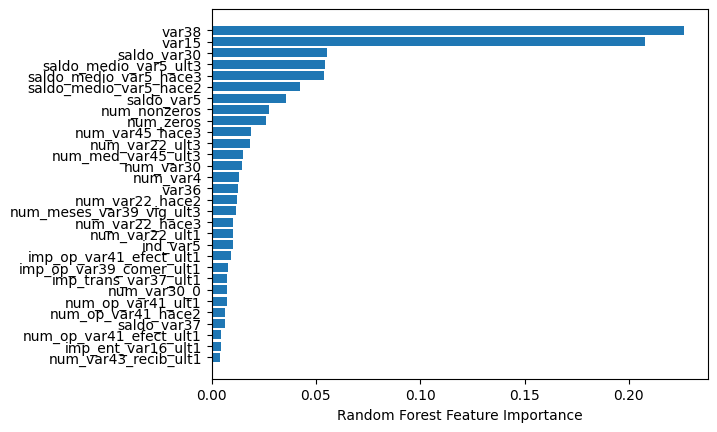

In [265]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(dfTrain.drop(labels=['TARGET'], axis = 1), dfTrain.TARGET)

# Get importance
importance = model.feature_importances_

# ### Plot
sorted_idx = importance.argsort()[-30:]
plt.barh(dfTrain.drop(labels=['TARGET'], axis = 1).columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

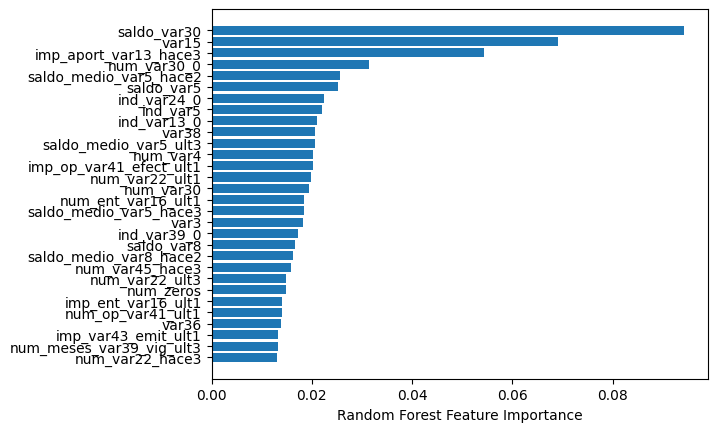

In [266]:
model = XGBClassifier(scale_pos_weight = 25)
model.fit(dfTrain.drop(labels=['TARGET'], axis = 1), dfTrain.TARGET)

# ### Get importance
importance = model.feature_importances_

# ### Plot
sorted_idx = importance.argsort()[-30:]
plt.barh(dfTrain.drop(labels=['TARGET'], axis = 1).columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [267]:
# ### Save new data
dfTrain.to_csv('train_feeng.csv', encoding='utf-8', index=False)
dfVal.to_csv('val_feeng.csv', encoding='utf-8', index=False)
dfTest.to_csv('test_feeng.csv', encoding='utf-8', index=False)